In [ ]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import process
from wordcloud import WordCloud
import ast

Breaking down the excel for sql analysis

In [ ]:
df = pd.read_excel('/content/YELP Restaurants FL.xlsx', sheet_name = 'ALL FL Extracted')
print(df.head())

KeyboardInterrupt: 

In [ ]:
category = df['category_name'].unique()

df_category = category.tolist()
print(df_category)

In [ ]:
table = [['Index', 'Category']]  # Adding headers
for idx, category in enumerate(df_category):
    table.append([idx, category])

# Print the table in a simple tabular format
for row in table:
    print(f"{row[0]:<10} {row[1]}")

In [ ]:
city = df['city'].unique()

city = city.tolist()
print(city)

In [ ]:
table = [['Index', 'Category']]  # Adding headers
for idx, category in enumerate(city):
    table.append([idx, category])

# Print the table in a simple tabular format
for row in table:
    print(f"{row[0]:<10} {row[1]}")

Visualizations of data exported from sql analysis

In [ ]:
city_df = pd.read_csv('/content/FL city.csv')
category_df = pd.read_csv('/content/FL restaurant categories.csv')

print(city_df.head())
print(category_df.head())

Looking at reviews and stars for restaurants by city

In [ ]:
city_rating = city_df.groupby('city')['stars'].mean()
city_stars = city_df.groupby('city')['stars'].count()
city_review = city_df.groupby('city')['total_reviews'].sum()
print(city_rating)
print(city_stars)
print(city_review)

In [ ]:
# Function to deduplicate and merge city names using fuzzy matching
def merge_city_names(city_df, city, threshold=85):
    unique_cities = []
    city_map = {}

    for city in city_df['city']:
        match = process.extractOne(city, unique_cities, score_cutoff=threshold)
        if match:
            city_map[city] = match[0]
        else:
            unique_cities.append(city)
            city_map[city] = city

    city_df['city'] = city_df['city'].map(city_map)
    return city_df

df = merge_city_names(city_df, 'city')

# Group by city and aggregate the data
df_aggregated = df.groupby('city', as_index=False).agg(
    star_count=('stars', 'mean'),
    reviews=('total_reviews', 'sum')
)

print(df_aggregated)


In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(df_aggregated['city'], df_aggregated['star_count'], color='skyblue')
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Star Count', fontsize=12)
plt.title('Average Star Ratings for Restaurants by City', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(1, 5)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(df_aggregated['city'], df_aggregated['reviews'], color='skyblue')
plt.xlabel('City', fontsize=12)
plt.ylabel('Total review count', fontsize=12)
plt.title('Total Number of Restaurant Reviews by City', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_aggregated_sorted = df_aggregated.sort_values('reviews', ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(df_aggregated_sorted['city'], df_aggregated_sorted['reviews'], color='skyblue')
plt.xlabel('City', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.title('Total Number of Restaurant Reviews by City', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Label top 5 and bottom 3 cities
for i, v in enumerate(df_aggregated_sorted['reviews']):
    if i < 5 or i >= len(df_aggregated_sorted) - 3:  # Check if it's in top 5 or bottom 3
        plt.text(i, v + 0.1, str(round(v, 2)), ha='center', color='black')

plt.tight_layout()
plt.show()

Analysis of reviews and ratings by restraurant distance

In [ ]:
hotel_df = pd.read_csv('/content/matched_zip_data.csv')
hotel_df.head()

,bid,business_id,restaurant name,address,city,state,postal_code,latitude,longitude,stars,...,Star 5,Star 4,Star 3,Star 2,Star 1,Average Stars,zipcode,distance_km,average,thumbup
0,12,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.95527,-82.45632,4.0,...,787,375,145,77,133,4.058668,33602,1.002244,4.058668,0.765985
1,12,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.95527,-82.45632,4.0,...,829,329,158,110,230,3.855676,33602,0.421970,3.855676,0.699275
2,12,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.95527,-82.45632,4.0,...,873,117,28,14,53,4.606452,33602,1.622866,4.606452,0.912442
3,12,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.95527,-82.45632,4.0,...,837,261,102,34,64,4.365948,33602,0.590933,4.365948,0.845917
4,12,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.95527,-82.45632,4.0,...,3770,1163,289,105,172,4.501000,33602,1.622182,4.501000,0.897072


In [ ]:
rental_df = pd.read_csv('/content/matched_rental_df.csv')
rental_df.head()

,bid,business_id,restaurant name,address,city,state,postal_code,latitude,longitude,stars,...,Rental Name,Coordinates,Latitude,Longitude,Link,rental_ratings,Reviews,Address,zipcode,distance_km
0,107,vje0KIiE7vtpx7JzmBx5LQ,The Pearl,163 107th Ave,Treasure Island,FL,33706,27.76940,-82.76732,4.0,...,Land's End 203 building 1 Cute Coastal and Com...,"{'latitude': 27.7414608001709, 'longitude': -8...",27.741461,-82.756218,https://www.google.com/travel/search?q=7553%2C...,4.0,48,"7553, Bayshore Drive, Sunset Beach, Treasure I...",33706,3.283853
1,107,vje0KIiE7vtpx7JzmBx5LQ,The Pearl,163 107th Ave,Treasure Island,FL,33706,27.76940,-82.76732,4.0,...,Sunrise Resort Unit 502,"{'latitude': 27.732839584350586, 'longitude': ...",27.732840,-82.744789,NaN,4.7,11,"Boulevard Burgers and Tap House, 5905, Gulf Bo...",33706,4.620419
2,186,P10BsKUeoeCeVoK4BS2u0w,Trust Me BBQ,8624 US Hwy 301 S,Riverview,FL,33569,27.86526,-82.32609,4.0,...,Discover Your Home Away from Home in Riverview,"{'latitude': 27.85757064819336, 'longitude': -...",27.857571,-82.328140,https://www.vrbo.com/4055614?MDPCID=VRBO-META....,5.0,1,"9616, Pineridge Avenue, Riverview, Hillsboroug...",33569,0.875711
3,186,P10BsKUeoeCeVoK4BS2u0w,Trust Me BBQ,8624 US Hwy 301 S,Riverview,FL,33569,27.86526,-82.32609,4.0,...,"Entire home just outside Tampa, FL","{'latitude': 27.86549949645996, 'longitude': -...",27.865499,-82.349129,https://www.bluepillow.com/search?p_id=589dfd6...,5.0,2,"9431, Star Gazer Lane, Riverview, Hillsborough...",33569,2.269097
4,189,QjV4v7q_pt7tt3K1US7IHg,PDQ Temple Terrace,5112 E Fowler Ave,Tampa,FL,33617,28.05489,-82.39955,3.0,...,BayCation,"{'latitude': 28.048564910888672, 'longitude': ...",28.048565,-82.401100,https://www.vacasa.com/unit/118653,3.8,4,"5025, East 110th Avenue, Tampa, Hillsborough C...",33617,0.717325


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10542 entries, 0 to 10541
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bid                10542 non-null  int64  
 1   business_id        10542 non-null  object 
 2   restaurant name    10542 non-null  object 
 3   address            10420 non-null  object 
 4   city               10542 non-null  object 
 5   state              10542 non-null  object 
 6   postal_code        10542 non-null  int64  
 7   latitude           10542 non-null  float64
 8   longitude          10542 non-null  float64
 9   stars              10542 non-null  float64
 10  review_count       10542 non-null  int64  
 11  is_open            10542 non-null  int64  
 12  cid                10542 non-null  int64  
 13  category_name      10542 non-null  object 
 14  Hotel Name         10542 non-null  object 
 15  Description        10164 non-null  object 
 16  Coordinates        105

In [ ]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11506 entries, 0 to 11505
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bid              11506 non-null  int64  
 1   business_id      11506 non-null  object 
 2   restaurant name  11506 non-null  object 
 3   address          11442 non-null  object 
 4   city             11506 non-null  object 
 5   state            11506 non-null  object 
 6   postal_code      11506 non-null  int64  
 7   latitude         11506 non-null  float64
 8   longitude        11506 non-null  float64
 9   stars            11506 non-null  float64
 10  review_count     11506 non-null  int64  
 11  is_open          11506 non-null  int64  
 12  cid              11506 non-null  int64  
 13  category_name    11506 non-null  object 
 14  Rental Name      11506 non-null  object 
 15  Coordinates      11506 non-null  object 
 16  Latitude         11506 non-null  float64
 17  Longitude   

In [ ]:
# Drop columns for restaurant analysis
hotel_df = hotel_df.drop(columns=['Description', 'Hotel Class','Link', 'Ratings', 'Reviews', 'Reviews Breakdown',
                            'Star 5', 'Star 4', 'Star 3', 'Star 2', 'Star 1', 'is_open', 'cid', 'category_name',
                            'Average Stars', 'average', 'thumbup'])
print(hotel_df.info())

rental_df = rental_df.drop(columns=['Link', 'Reviews', 'is_open', 'cid', 'category_name', 'rental_ratings'])
print(rental_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10542 entries, 0 to 10541
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bid              10542 non-null  int64  
 1   business_id      10542 non-null  object 
 2   restaurant name  10542 non-null  object 
 3   address          10420 non-null  object 
 4   city             10542 non-null  object 
 5   state            10542 non-null  object 
 6   postal_code      10542 non-null  int64  
 7   latitude         10542 non-null  float64
 8   longitude        10542 non-null  float64
 9   stars            10542 non-null  float64
 10  review_count     10542 non-null  int64  
 11  Hotel Name       10542 non-null  object 
 12  Coordinates      10542 non-null  object 
 13  Latitude         10542 non-null  float64
 14  Longitude        10542 non-null  float64
 15  Address          10542 non-null  object 
 16  zipcode          10542 non-null  int64  
 17  distance_km 

In [ ]:
# Rename columns for analysis
hotel_df = hotel_df.rename(columns={'Hotel Name': 'name'})
rental_df = rental_df.rename(columns={'Rental Name': 'name'})
print(hotel_df.head())
print(rental_df.head())

hotel_df.to_csv('hotel_df_data.csv', index=False)
rental_df.to_csv('rental_df_data.csv', index=False)

   bid             business_id        restaurant name address       city  \
0   12  eEOYSgkmpB90uNA7lDOMRA  Vietnamese Food Truck     NaN  Tampa Bay   
1   12  eEOYSgkmpB90uNA7lDOMRA  Vietnamese Food Truck     NaN  Tampa Bay   
2   12  eEOYSgkmpB90uNA7lDOMRA  Vietnamese Food Truck     NaN  Tampa Bay   
3   12  eEOYSgkmpB90uNA7lDOMRA  Vietnamese Food Truck     NaN  Tampa Bay   
4   12  eEOYSgkmpB90uNA7lDOMRA  Vietnamese Food Truck     NaN  Tampa Bay   

  state  postal_code  latitude  longitude  stars  review_count  \
0    FL        33602  27.95527  -82.45632    4.0            10   
1    FL        33602  27.95527  -82.45632    4.0            10   
2    FL        33602  27.95527  -82.45632    4.0            10   
3    FL        33602  27.95527  -82.45632    4.0            10   
4    FL        33602  27.95527  -82.45632    4.0            10   

                                                name  \
0                               Aloft Tampa Downtown   
1  Hotel Flor Tampa Downtown, Tape

In [ ]:
# Merge the dataframes
yelp_unique = pd.merge(hotel_df, rental_df, on='business_id', how='inner')

yelp_unique = yelp_unique.loc[:, ~yelp_unique.columns.str.endswith('_x')]

yelp_unique.rename(columns={'name_y': 'name', 'bid_y' : 'bid', 'restaurant name_y': 'restaurant name', 'address_y':'address',
                          'city_y':'city', 'state_y':'state', 'postal_code_y':'postal_code', 'latitude_y' : 'latitude',
                          'longitude_y':'longitude', 'stars_y':'stars', 'review_count_y':'review_count',
                          'distance_km_y':'distance_km', 'Coordinates_y': 'Coordinates', 'Latitude_y': 'Latitude',
                          'Longitude_y': 'Longitude', 'Address_y':'Address', 'zipcode_y':'zipcode'}, inplace=True)
print(yelp_unique.shape)
print(yelp_unique.info())

(17317, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17317 entries, 0 to 17316
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   business_id      17317 non-null  object 
 1   bid              17317 non-null  int64  
 2   restaurant name  17317 non-null  object 
 3   address          17278 non-null  object 
 4   city             17317 non-null  object 
 5   state            17317 non-null  object 
 6   postal_code      17317 non-null  int64  
 7   latitude         17317 non-null  float64
 8   longitude        17317 non-null  float64
 9   stars            17317 non-null  float64
 10  review_count     17317 non-null  int64  
 11  name             17317 non-null  object 
 12  Coordinates      17317 non-null  object 
 13  Latitude         17317 non-null  float64
 14  Longitude        17317 non-null  float64
 15  Address          17317 non-null  object 
 16  zipcode          17317 non-null  int64  
 17  

In [ ]:
# Function to deduplicate and merge city names using fuzzy matching
def merge_city_names(city_df, city, threshold=85):
    unique_cities = []
    city_map = {}

    for city in city_df['city']:
        match = process.extractOne(city, unique_cities, score_cutoff=threshold)
        if match:
            city_map[city] = match[0]
        else:
            unique_cities.append(city)
            city_map[city] = city

    city_df['city'] = city_df['city'].map(city_map)
    return city_df

yelp_unique= merge_city_names(yelp_unique, 'city')
print(yelp_unique.head())
print(yelp_unique.shape)

              business_id  bid restaurant name        address  \
0  vje0KIiE7vtpx7JzmBx5LQ  107       The Pearl  163 107th Ave   
1  vje0KIiE7vtpx7JzmBx5LQ  107       The Pearl  163 107th Ave   
2  vje0KIiE7vtpx7JzmBx5LQ  107       The Pearl  163 107th Ave   
3  vje0KIiE7vtpx7JzmBx5LQ  107       The Pearl  163 107th Ave   
4  vje0KIiE7vtpx7JzmBx5LQ  107       The Pearl  163 107th Ave   

              city state  postal_code  latitude  longitude  stars  \
0  Treasure Island    FL        33706   27.7694  -82.76732    4.0   
1  Treasure Island    FL        33706   27.7694  -82.76732    4.0   
2  Treasure Island    FL        33706   27.7694  -82.76732    4.0   
3  Treasure Island    FL        33706   27.7694  -82.76732    4.0   
4  Treasure Island    FL        33706   27.7694  -82.76732    4.0   

   review_count                                               name  \
0           129  Land's End 203 building 1 Cute Coastal and Com...   
1           129                            Sunrise Res

In [ ]:
# ANOVA test to see if the stars differ across ranges of distances
import pandas as pd
import scipy.stats as stats

#Separate the distances into groups
bins = [0, 0.8, 1.6, 2.4, 3.2, float('inf')]
labels = ['0-0.8 km', '0.8-1.6 km', '1.6-2.4 km', '2.4-3.2 km', 'greater than 3.2 km']
yelp_unique['Distance_Range'] = pd.cut(yelp_unique['distance_km'], bins=bins, labels=labels, right=False)
print(yelp_unique[['distance_km', 'Distance_Range']].head())

# Exclude the rows where 'Distance_Range' is 'Greater than 3.2km'
yelp_filtered = yelp_unique[yelp_unique['Distance_Range'] != 'greater than 3.2 km']
yelp_filtered = yelp_filtered.dropna(subset=['Distance_Range'])

# ANOVA test
f_stat, p_value = stats.f_oneway(
    yelp_filtered[yelp_filtered['Distance_Range'] == '0-0.8 km']['stars'],
    yelp_filtered[yelp_filtered['Distance_Range'] == '0.8-1.6 km']['stars'],
    yelp_filtered[yelp_filtered['Distance_Range'] == '1.6-2.4 km']['stars'],
    yelp_filtered[yelp_filtered['Distance_Range'] == '2.4-3.2 km']['stars']
)

print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("The means of stars are significantly different across the distance ranges.")
else:
    print("There is no significant difference in stars across the distance ranges.")

   distance_km       Distance_Range
0     3.283853  greater than 3.2 km
1     4.620419  greater than 3.2 km
2     3.283853  greater than 3.2 km
3     4.620419  greater than 3.2 km
4     3.283853  greater than 3.2 km
ANOVA F-statistic: 16.593532864064947, p-value: 9.376686741569927e-11
The means of stars are significantly different across the distance ranges.


<ipython-input-151-b55c386d7054>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_stars = yelp_filtered.groupby('Distance_Range')['stars'].mean().reset_index()


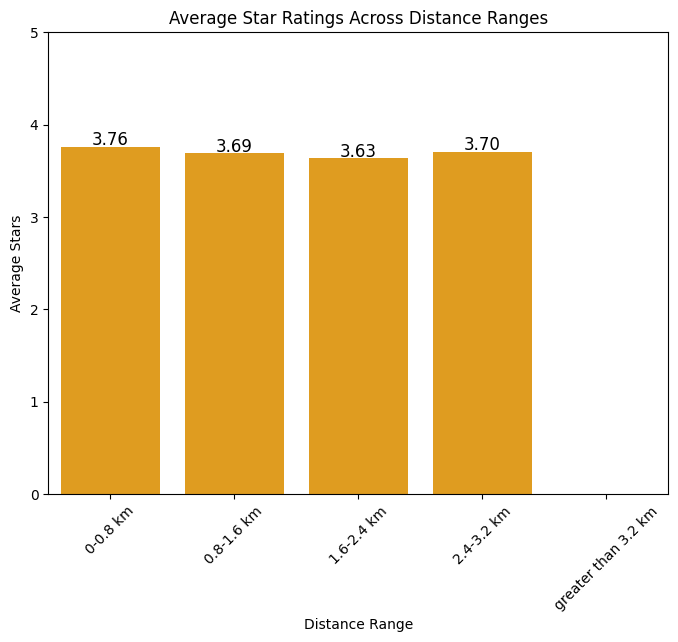

In [ ]:
#Plot the anova results
import seaborn as sns
mean_stars = yelp_filtered.groupby('Distance_Range')['stars'].mean().reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Distance_Range', y='stars', data=mean_stars, color = 'orange')
plt.ylim(0, 5)
plt.title('Average Star Ratings Across Distance Ranges')
plt.xlabel('Distance Range')
plt.ylabel('Average Stars')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

In [ ]:
yelp_unique.to_csv('yelp_restaurant_q1.csv', index=False)

In [159]:
# ANOVA test to see if the review count differ across ranges of distances
# ANOVA test
f_stat, p_value = stats.f_oneway(
    yelp_filtered[yelp_filtered['Distance_Range'] == '0-0.8 km']['review_count'],
    yelp_filtered[yelp_filtered['Distance_Range'] == '0.8-1.6 km']['review_count'],
    yelp_filtered[yelp_filtered['Distance_Range'] == '1.6-2.4 km']['review_count'],
    yelp_filtered[yelp_filtered['Distance_Range'] == '2.4-3.2 km']['review_count']
)

print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("The means of stars are significantly different across the distance ranges.")
else:
    print("There is no significant difference in stars across the distance ranges.")

ANOVA F-statistic: 20.256470424083993, p-value: 4.3559672914584206e-13
The means of stars are significantly different across the distance ranges.


<ipython-input-155-91877d9895ed>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_reviews = yelp_filtered.groupby('Distance_Range')['review_count'].sum().reset_index()


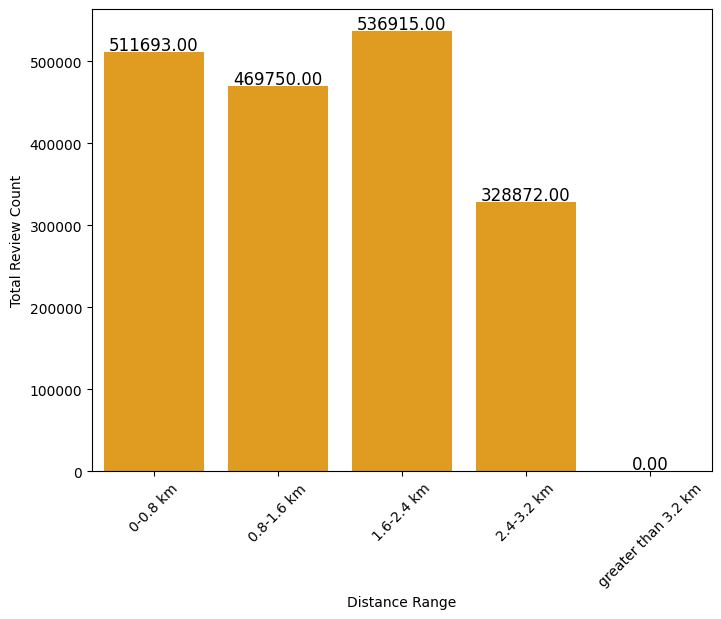

In [155]:
#Plot the anova results
import seaborn as sns
sum_reviews = yelp_filtered.groupby('Distance_Range')['review_count'].sum().reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Distance_Range', y='review_count', data=sum_reviews, color = 'orange')
#plt.title('Total Review Count Across Distance Ranges')
plt.xlabel('Distance Range')
plt.ylabel('Total Review Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

In [156]:
# ANOVA test to see if the star count differ across ranges of distances
count_stars = yelp_filtered.groupby(['Distance_Range', 'stars']).size().reset_index(name='count')
print(count_stars.head())

# ANOVA Test
groups = [count_stars[count_stars['Distance_Range'] == label]['count'] for label in count_stars['Distance_Range'].unique()]

f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_val}")

  Distance_Range  stars  count
0       0-0.8 km    1.0      0
1       0-0.8 km    1.5      6
2       0-0.8 km    2.0     48
3       0-0.8 km    2.5    136
4       0-0.8 km    3.0    383
ANOVA F-statistic: 2.2395048399858797
ANOVA p-value: 0.08185769694209794


<ipython-input-156-c24309c8b8f5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_stars = yelp_filtered.groupby(['Distance_Range', 'stars']).size().reset_index(name='count')


<ipython-input-158-ac7a1bf641bf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Distance_Range', y='count', hue='stars', palette = 'viridis', data=count_stars, ci=None)


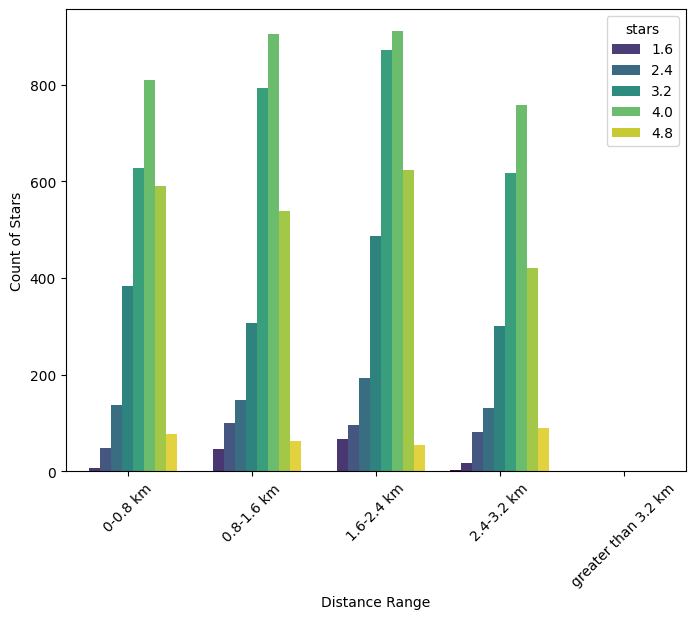

In [158]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Distance_Range', y='count', hue='stars', palette = 'viridis', data=count_stars, ci=None)

# plt.title('Count of Stars Ratings Across Distance Ranges')
plt.xlabel('Distance Range')
plt.ylabel('Count of Stars')
plt.xticks(rotation=45)
plt.show()